# Лабораторная работа 3
### Scikit-learn Supervised ML (Машинное обучение с учителем)
![Image of Scikit-learn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png)

1. Прочитайте очень простое введение о машинном обучении с учителем: https://ru.wikipedia.org/wiki/Обучение_с_учителем
2. Более подробное описание есть здесь: http://www.machinelearning.ru/wiki/index.php?title=Обучение_с_учителем
3. Основные методы Supervised ML:
    * Байесовские классификаторы
    * Нейронные сети
    * Решающие деревья и леса
    * Композиции в виде взвешенных голосований, бустингов, бэггингов
    * Линейная регрессия
4. В данной работе будут рассмотрены только регрессионные модели, методы классификации Вы можете найти по ссылке внизу

Документация scikit-learn по Supervised методам: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = datasets.load_diabetes() # загрузим данные
Y, X = data['target'], data['data'].T
features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] # признаки в датасете

## 1. Постройте графики зависимостей target (Y) от признаков (X) как единый plot с использованием команды plt.subplot

Text(0,0.5,'target')

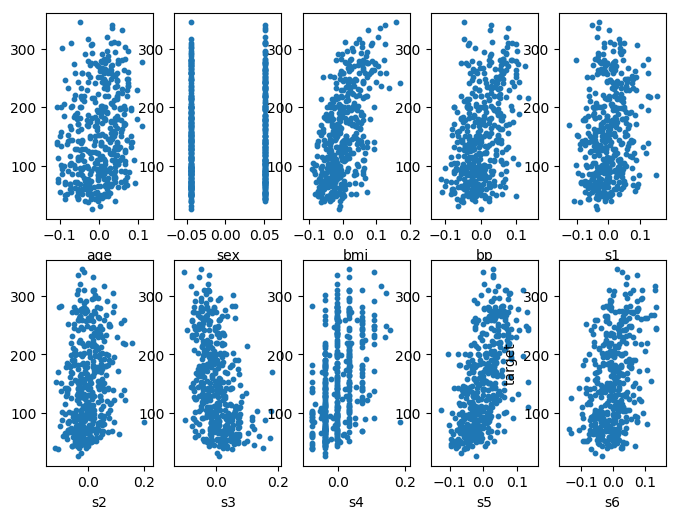

In [9]:
fig = plt.figure(figsize=(8,6def get_RX(x1, x2):
    return [[ x1[i]**2, x1[i], x2[i]**2, x2[i], 1 ] for i,_ in enumerate(x1)]

reg = [None, None, None]
for i,j in [(i1,j1) for i1 in range(10) for j1 in range(10)]:
    lreg = linear_model.LinearRegression(fit_intercept=False)
    RX = get_RX(X[i], X[j])
    lreg.fit(RX, Y)
    lscore = lreg.score(RX, Y)

    if reg[0] == None or reg[1] < lscore:
        reg = [lreg, lscore, (i, j)]

print('\nНелинейная множественная регрессия')
print('Коэффициенты', reg[0].coef_)
print('Коэф. детерм.', reg[1])
i,j = reg[2]
reg = reg[0]

x1 = np.linspace(X[i].min(), X[i].max(), 100)
x2 = np.linspace(X[j].min(), X[j].max(), 100)
x1,x2 = np.meshgrid(x1, x2)
RX = get_RX(x1,x2)
y = np.asarray([ np.sum(reg.coef_*x) for x in RX ])

from mpl_toolkits.mplot3d import Axes3D

plt.figure()
ax = Axes3D(plt.gcf())
ax.scatter(X[i], X[j], Y, c='r')
ax.plot_surface(x1, x2, y)

from sklearn.metrics import mean_absolute_error
y_true = Y
y_pred = [ np.sum(reg.coef_*x) for x in get_RX(X[i], X[j]) ]
mae = mean_absolute_error(y_true, y_pred)
print(mae)
), dpi=100)
for i, val in enumerate(features):
    plt.subplot(2, 5, i+1)
    plt.scatter(x=X[i], y=Y, s=10)
    plt.xlabel(val)
plt.ylabel('target')

## 2. Линейные модели

[949.43526038 152.13348416]
0.3439237602253803


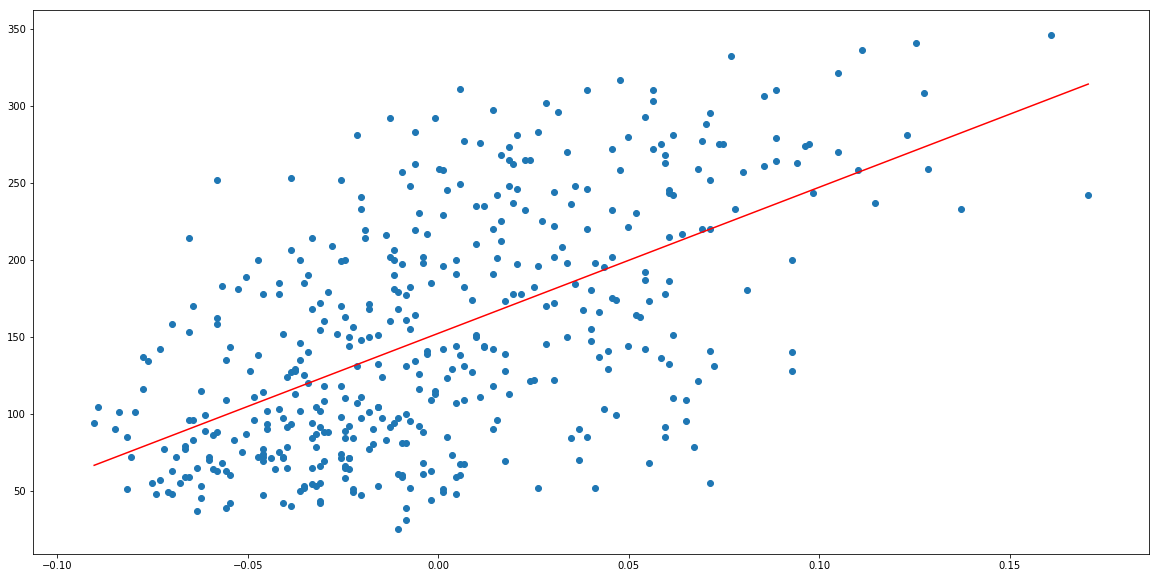

In [5]:
from sklearn import linear_model

feature = 2 # номер признака

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit([[x, 1] for x in X[feature]], Y) # обучим регрессию k*x + b*1, метод осуществит подбор коэффциентов k и b
print(reg.coef_) # вывести коэффициенты
print(reg.score([[x, 1] for x in X[feature]], Y)) # вывести score

points = np.linspace(X[feature].min(), X[feature].max(), 100) # вы берем значения для предсказания
target = [np.sum(reg.coef_*[x, 1]) for x in points] # предсказания модели

plt.figure(figsize=(20, 10))
plt.scatter(X[feature], Y)
plt.plot(points, target, c='r')
plt.show()

## 3. Постройте полиномиальную модель 4 степени с использованием второго признака для предсказания Y. Полином выглядит так: ax^4 + bx^3 + ... + b = Y


Нелинейная простая регрессия
Коэффициенты [114576.32206995 -25895.11668061    412.54705785   1055.27334075
    151.05466919]
Коэф. детерм. 0.3455949866318273


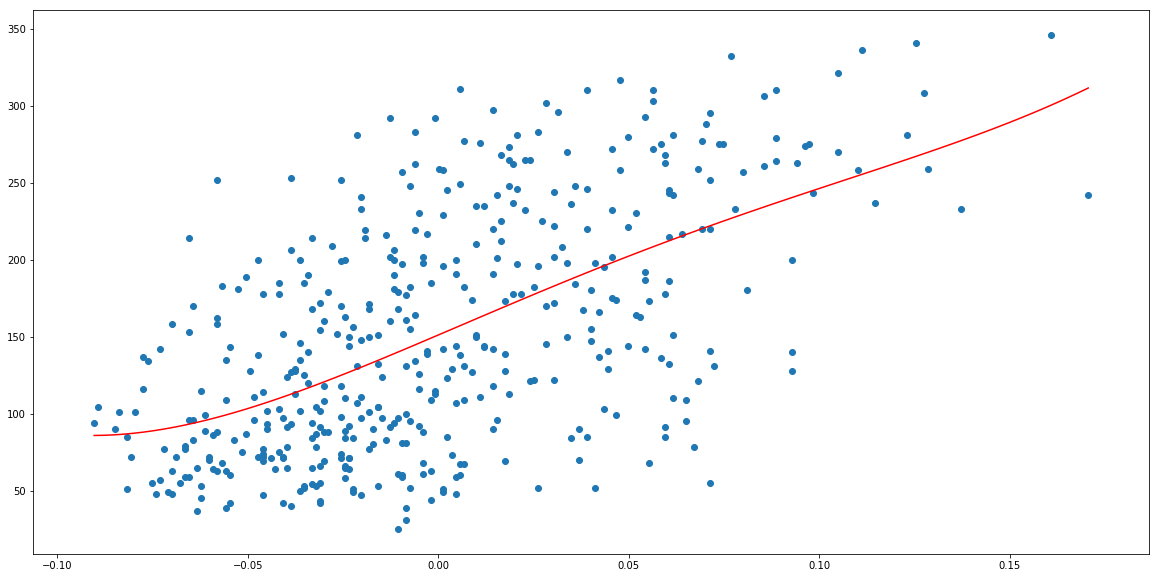

In [7]:
feature = 2

def get_sample(x):
    return [x**4, x**3, x**2, x, 1]

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit([get_sample(x) for x in X[feature]], Y)

print('\nНелинейная простая регрессия')
print('Коэффициенты', reg.coef_)
print('Коэф. детерм.', reg.score([get_sample(x) for x in X[feature]], Y))

points = np.linspace(X[feature].min(), X[feature].max(), 100)
target = [np.sum(reg.coef_*get_sample(x)) for x in points]

plt.figure(figsize=(20, 10))
plt.scatter(X[feature], Y)
plt.plot(points, target, c='r')

## 4. Постройте полиномиальную модель с использованием трех любых признаков и выведите метрику MAE (Mean Absolute Error) 


Нелинейная множественная регрессия
Коэффициенты [1810.59356893  611.83756929 -536.35406909  644.05292742  149.25058937]
Коэф. детерм. 0.46442950563754065
46.35064201890731


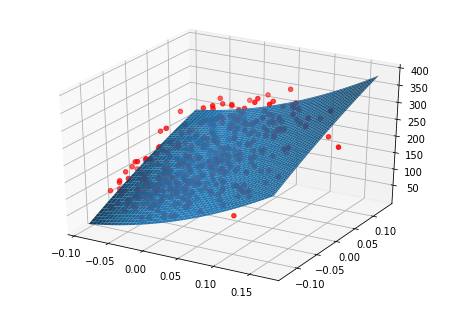

In [10]:
def get_RX(x1, x2):
    return [[ x1[i]**2, x1[i], x2[i]**2, x2[i], 1 ] for i,_ in enumerate(x1)]

reg = [None, None, None]
for i,j in [(i1,j1) for i1 in range(10) for j1 in range(10)]:
    lreg = linear_model.LinearRegression(fit_intercept=False)
    RX = get_RX(X[i], X[j])
    lreg.fit(RX, Y)
    lscore = lreg.score(RX, Y)

    if reg[0] == None or reg[1] < lscore:
        reg = [lreg, lscore, (i, j)]

print('\nНелинейная множественная регрессия')
print('Коэффициенты', reg[0].coef_)
print('Коэф. детерм.', reg[1])
i,j = reg[2]
reg = reg[0]

x1 = np.linspace(X[i].min(), X[i].max(), 100)
x2 = np.linspace(X[j].min(), X[j].max(), 100)
x1,x2 = np.meshgrid(x1, x2)
RX = get_RX(x1,x2)
y = np.asarray([ np.sum(reg.coef_*x) for x in RX ])

from mpl_toolkits.mplot3d import Axes3D

plt.figure()
ax = Axes3D(plt.gcf())
ax.scatter(X[i], X[j], Y, c='r')
ax.plot_surface(x1, x2, y)

from sklearn.metrics import mean_absolute_error
y_true = Y
y_pred = [ np.sum(reg.coef_*x) for x in get_RX(X[i], X[j]) ]
mae = mean_absolute_error(y_true, y_pred)
print(mae)

## 5. SVM и tree модели. С использованием метода svm.SVR и tree.DecisionTreeRegressor постройте модели с использованием метода опорных векторов и деревьев принятия решений. Выведите среднее значение вектора Y и MAE построенных моделей. Для обучения и тестирования независимые выборки.

In [11]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(
X.T, Y, test_size=0.4, random_state=0)

In [12]:
from sklearn import svm
model = svm.SVR()
preds = model.fit(train_X, train_y).predict(test_X)
mae = mean_absolute_error(test_y, preds)
print('\nОпорный вектор')
print('Ср. ар. предсказаний', np.mean(preds))
print('Ошибка', mae)

from sklearn import tree
model = tree.DecisionTreeRegressor(random_state=0)
preds = model.fit(train_X, train_y).predict(test_X)
mae = mean_absolute_error(test_y, preds)
print('\nЛес')
print('Ср. ар. предсказаний', np.mean(preds))
print('Ошибка', mae)


Опорный вектор
Ср. ар. предсказаний 140.91129547035194
Ошибка 59.91544545441163

Лес
Ср. ар. предсказаний 154.31638418079095
Ошибка 61.48022598870057


## 6. Используйте 5-fold кросс-валидацию для обучения любой понравившейся Вам модели (https://scikit-learn.org/stable/modules/cross_validation.html). Выведите метрики тестов для каждого получившегося набора (должно получится 5 независимых друг от друга метрик).